In [66]:
import pandas as pd
import numpy as np 
import os
import plotly.express as px
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from matplotlib import pyplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# For investigating timeseries data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing

# Modeling
from tqdm import tqdm_notebook
from itertools import product
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox


In [20]:
# Reading Data
base_path =  os.getcwd()
file_name = 'Traffic_Data.xlsx'
total_path = base_path + '//Data//' 
df = pd.read_excel(total_path + file_name, sheet_name='Sheet1')

# Filtering for just one state
df = df[df['State'] == 'Washington']
df.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date
49,Washington,West,164,4527,4288,November,11,2023,2023-11-01
100,Washington,West,170,4438,4079,December,12,2023,2023-12-01
151,Washington,West,166,5015,4953,October,10,2023,2023-10-01
202,Washington,West,166,5216,5189,September,9,2023,2023-09-01
253,Washington,West,162,5885,5839,August,8,2023,2023-08-01
304,Washington,West,164,5945,5801,July,7,2023,2023-07-01
355,Washington,West,168,5537,5302,June,6,2023,2023-06-01
406,Washington,West,173,5387,5109,May,5,2023,2023-05-01
457,Washington,West,181,4698,4686,April,4,2023,2023-04-01
508,Washington,West,181,4750,4770,March,3,2023,2023-03-01


### Initial Decomposition

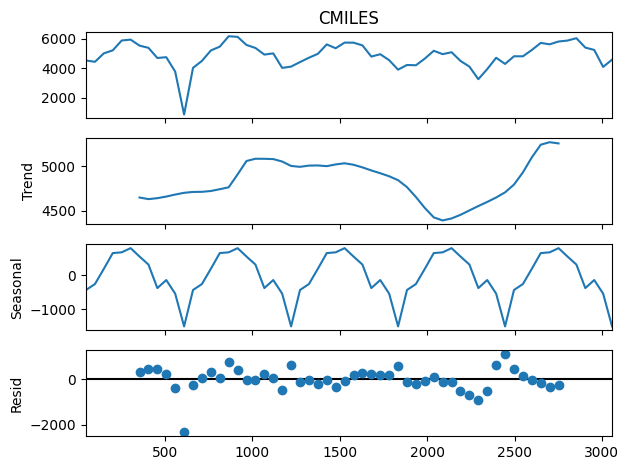

In [21]:
result = seasonal_decompose(df[df['State'] == 'Washington']['CMILES'], model='additive', period=12)
result.plot()
pyplot.show()

### Checking if Data is Stationary

In [22]:
dftest = adfuller(df['CMILES'])

# Printing results
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical Values:')
for key, value in dftest[4].items():
 print('\t%s: %.3f' % (key, value))

# p < 0.05 so data is stationary

ADF Statistic: -4.709270
p-value: 0.000081
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596


### Checking ACF
Need to determine autocorrelation coefficient, i.e. how many time steps back is our current datapoint dependent on

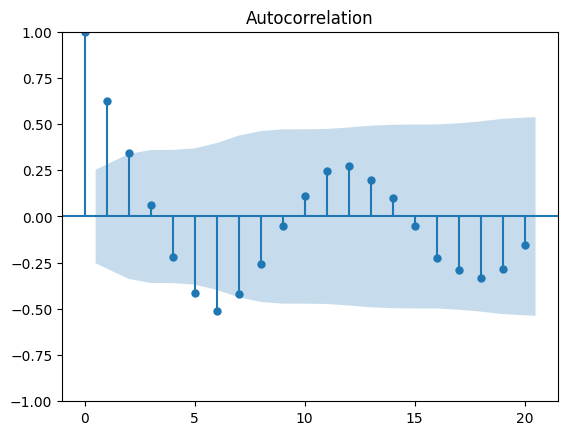

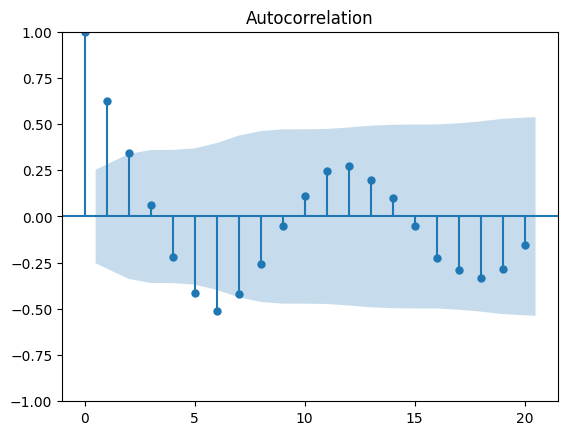

In [23]:
plot_acf(df['CMILES'], lags= 20)

## Training Model MA model

In [24]:
test_train_split = 0.9
train = df[:int(test_train_split * len(df['CMILES']))]
test = df[int(test_train_split * len(df['CMILES'])):]
test.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date
2803,Washington,West,163,5881,5758,June,6,2019,2019-06-01
2854,Washington,West,169,6041,5844,May,5,2019,2019-05-01
2905,Washington,West,170,5404,5229,April,4,2019,2019-04-01
2956,Washington,West,166,5245,5233,March,3,2019,2019-03-01
3007,Washington,West,158,4089,4474,February,2,2019,2019-02-01
3058,Washington,West,130,4586,4383,January,1,2019,2019-01-01


In [25]:
def train_MA(df, test, train_length):

    # Initializing list to store predictions
    pred_MA = []

    predictions = []
    for month in range(len(test)):
        model = SARIMAX(df[:train_len + month], order= (0, 0, 3))
        model_fit = model.fit()
        output = model_fit.forecast()
        pred_MA.append(output)

    return pred_MA

train_len = len(train)
test_len = len(test)
window = 2

# calling function and returning predictions
ma_predictions = train_MA(df['CMILES'], test['CMILES'], train_len)
print(ma_predictions)


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarni

[54    4538.262624
dtype: float64, 55    4241.643171
dtype: float64, 56    5137.355067
dtype: float64, 57    3566.674761
dtype: float64, 58    3936.000536
dtype: float64, 59    2125.894585
dtype: float64]


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
ma_predicted_df = test.copy()
ma_predicted_df['MA_Pred'] = ma_predictions
ma_predicted_df.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date,MA_Pred
2803,Washington,West,163,5881,5758,June,6,2019,2019-06-01,54 4538.262624 dtype: float64
2854,Washington,West,169,6041,5844,May,5,2019,2019-05-01,55 4241.643171 dtype: float64
2905,Washington,West,170,5404,5229,April,4,2019,2019-04-01,56 5137.355067 dtype: float64
2956,Washington,West,166,5245,5233,March,3,2019,2019-03-01,57 3566.674761 dtype: float64
3007,Washington,West,158,4089,4474,February,2,2019,2019-02-01,58 3936.000536 dtype: float64
3058,Washington,West,130,4586,4383,January,1,2019,2019-01-01,59 2125.894585 dtype: float64


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Ite

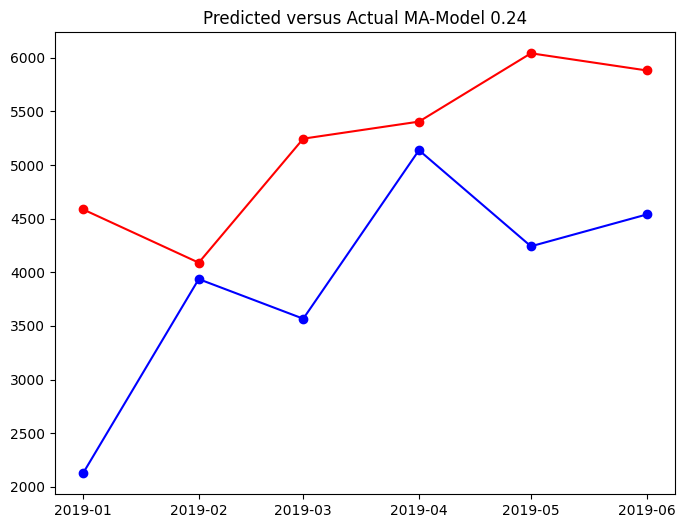

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
MA_mape = mean_absolute_percentage_error(ma_predicted_df['CMILES'], ma_predicted_df['MA_Pred'])
# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')

# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['MA_Pred'], color='BLUE')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['MA_Pred'], color='BLUE')
#print(MA_mape)
ax.set_title("Predicted versus Actual MA-Model " + str(round(MA_mape, 2)))
plt.show()

### Now adding Auto-Correlation factor

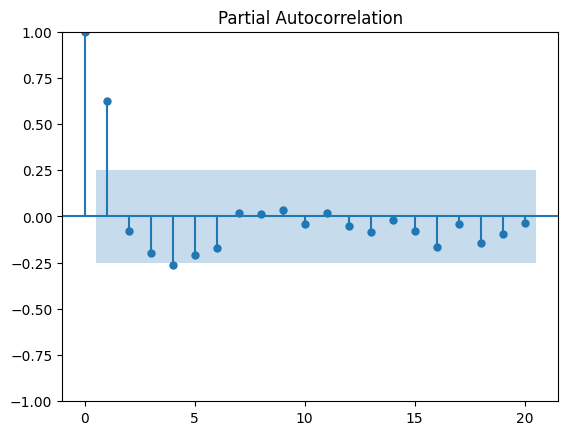

In [28]:
plot_pacf(df['CMILES'], lags=20)
pyplot.show()

In [29]:
# defining function for model training
def train_SARIMA(df, test, train_length):

    # Initializing list to store predictions
    pred_MA = []
    order = (2, 0, 3)
    predictions = []

    for month in range(len(test)):
        model = SARIMAX(df[:train_len + month], 
                        order= order)
        model_fit = model.fit()
        output = model_fit.forecast()
        pred_MA.append(output)

    return pred_MA

# calling function and returning predictions
sarima_predictions = train_SARIMA(df['CMILES'], test['CMILES'], train_len)
ma_predicted_df['SARIMA_Pred'] = sarima_predictions
ma_predicted_df.head(10)

c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.p

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date,MA_Pred,SARIMA_Pred
2803,Washington,West,163,5881,5758,June,6,2019,2019-06-01,54 4538.262624 dtype: float64,54 5754.552012 dtype: float64
2854,Washington,West,169,6041,5844,May,5,2019,2019-05-01,55 4241.643171 dtype: float64,55 5817.927958 dtype: float64
2905,Washington,West,170,5404,5229,April,4,2019,2019-04-01,56 5137.355067 dtype: float64,56 5992.138222 dtype: float64
2956,Washington,West,166,5245,5233,March,3,2019,2019-03-01,57 3566.674761 dtype: float64,57 5428.347015 dtype: float64
3007,Washington,West,158,4089,4474,February,2,2019,2019-02-01,58 3936.000536 dtype: float64,58 5256.790088 dtype: float64
3058,Washington,West,130,4586,4383,January,1,2019,2019-01-01,59 2125.894585 dtype: float64,59 4059.992925 dtype: float64


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Ite

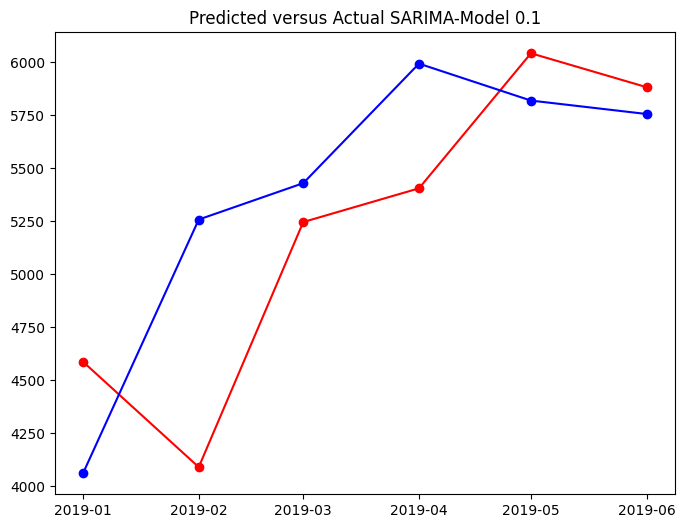

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sarima_mape = mean_absolute_percentage_error(ma_predicted_df['CMILES'], ma_predicted_df['SARIMA_Pred'])
# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')

# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['SARIMA_Pred'], color='BLUE')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['SARIMA_Pred'], color='BLUE')
#print(MA_mape)
ax.set_title("Predicted versus Actual SARIMA-Model " + str(round(sarima_mape, 2)))
plt.show()

### ARMA Modeling
First we define a function that we can use to perform gridsearch on our p, q variables

In [31]:
# Defining modeling function
def optimize_ARMA(endog,  order_list):
    results = []
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(
                endog,
                order = (order[0], order[1], order[2]),
                simple_differencing=False).fit(disp = False)
            aic = model.aic
            results.append([order, aic])
        except:
            continue
    results_df = pd.DataFrame(results)
    results_df.columns = ['(p,d,q)', 'AIC']
    # sorting results
    results_df = results_df.sort_values(by = 'AIC', ascending = True).reset_index(drop = True)

    return results_df

In [32]:
# normal variables
p = range(0, 4, 1)
d = range(0,1,1)
q = range(0, 4, 1)
# Combining parameters
parameters = product(p,d, q)

Now we'll call our function to perform gridsearch

In [33]:
# Training models
results_df = optimize_ARMA(df['CMILES'], parameters)

# viewing results
print(results_df.sort_values(by = ['AIC']))

C:\Users\seelc\AppData\Local\Temp\ipykernel_7748\1207475844.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


0it [00:00, ?it/s]

c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was prov

      (p,d,q)          AIC
0   (1, 0, 3)   968.552095
1   (1, 0, 0)   969.473095
2   (2, 0, 0)   970.576508
3   (1, 0, 1)   970.634809
4   (1, 0, 2)   972.559078
5   (2, 0, 1)   972.563433
6   (3, 0, 0)   972.578709
7   (2, 0, 2)   973.782886
8   (3, 0, 1)   974.608178
9   (3, 0, 2)   975.584783
10  (2, 0, 3)   975.626135
11  (3, 0, 3)   978.353580
12  (0, 0, 3)  1059.063243
13  (0, 0, 2)  1083.752674
14  (0, 0, 1)  1124.878723
15  (0, 0, 0)  1193.393340


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
# defining function for model training
def train_SARIMA_optimal(df, test, train_length):

    # Initializing list to store predictions
    pred_MA = []
    order = (1, 0, 3)
    predictions = []
    residuals = []

    for month in range(len(test)):
        model = SARIMAX(df[:train_len + month], 
                        order= order)
        model_fit = model.fit()
        output = model_fit.forecast()
        pred_MA.append(output)
        actual_val = list(df)[train_len + month]
        residuals.append(actual_val - output)

    return pred_MA, residuals

# calling function and returning predictions
optimal_ARMA_predictions, optimal_ARMA_residuals = train_SARIMA_optimal(df['CMILES'], test['CMILES'], train_len)
ma_predicted_df['otimal_ARMA_Pred'] = optimal_ARMA_predictions
ma_predicted_df['otimal_ARMA_res'] = optimal_ARMA_residuals
ma_predicted_df.head(10)

c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarni

[4527, 4438, 5015, 5216, 5885, 5945, 5537, 5387, 4698, 4750, 3772, 858, 4027, 4499, 5209, 5467, 6174, 6133, 5581, 5379, 4928, 5010, 4024, 4112, 4420, 4715, 4979, 5619, 5359, 5743, 5737, 5555, 4793, 4953, 4548, 3905, 4223, 4203, 4656, 5187, 4958, 5088, 4498, 4111, 3257, 3943, 4712, 4293, 4813, 4811, 5241, 5721, 5626, 5816, 5881, 6041, 5404, 5245, 4089, 4586]


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\s

[4527, 4438, 5015, 5216, 5885, 5945, 5537, 5387, 4698, 4750, 3772, 858, 4027, 4499, 5209, 5467, 6174, 6133, 5581, 5379, 4928, 5010, 4024, 4112, 4420, 4715, 4979, 5619, 5359, 5743, 5737, 5555, 4793, 4953, 4548, 3905, 4223, 4203, 4656, 5187, 4958, 5088, 4498, 4111, 3257, 3943, 4712, 4293, 4813, 4811, 5241, 5721, 5626, 5816, 5881, 6041, 5404, 5245, 4089, 4586]


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-For

[4527, 4438, 5015, 5216, 5885, 5945, 5537, 5387, 4698, 4750, 3772, 858, 4027, 4499, 5209, 5467, 6174, 6133, 5581, 5379, 4928, 5010, 4024, 4112, 4420, 4715, 4979, 5619, 5359, 5743, 5737, 5555, 4793, 4953, 4548, 3905, 4223, 4203, 4656, 5187, 4958, 5088, 4498, 4111, 3257, 3943, 4712, 4293, 4813, 4811, 5241, 5721, 5626, 5816, 5881, 6041, 5404, 5245, 4089, 4586]


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\s

[4527, 4438, 5015, 5216, 5885, 5945, 5537, 5387, 4698, 4750, 3772, 858, 4027, 4499, 5209, 5467, 6174, 6133, 5581, 5379, 4928, 5010, 4024, 4112, 4420, 4715, 4979, 5619, 5359, 5743, 5737, 5555, 4793, 4953, 4548, 3905, 4223, 4203, 4656, 5187, 4958, 5088, 4498, 4111, 3257, 3943, 4712, 4293, 4813, 4811, 5241, 5721, 5626, 5816, 5881, 6041, 5404, 5245, 4089, 4586]


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\s

[4527, 4438, 5015, 5216, 5885, 5945, 5537, 5387, 4698, 4750, 3772, 858, 4027, 4499, 5209, 5467, 6174, 6133, 5581, 5379, 4928, 5010, 4024, 4112, 4420, 4715, 4979, 5619, 5359, 5743, 5737, 5555, 4793, 4953, 4548, 3905, 4223, 4203, 4656, 5187, 4958, 5088, 4498, 4111, 3257, 3943, 4712, 4293, 4813, 4811, 5241, 5721, 5626, 5816, 5881, 6041, 5404, 5245, 4089, 4586]
[4527, 4438, 5015, 5216, 5885, 5945, 5537, 5387, 4698, 4750, 3772, 858, 4027, 4499, 5209, 5467, 6174, 6133, 5581, 5379, 4928, 5010, 4024, 4112, 4420, 4715, 4979, 5619, 5359, 5743, 5737, 5555, 4793, 4953, 4548, 3905, 4223, 4203, 4656, 5187, 4958, 5088, 4498, 4111, 3257, 3943, 4712, 4293, 4813, 4811, 5241, 5721, 5626, 5816, 5881, 6041, 5404, 5245, 4089, 4586]


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date,MA_Pred,SARIMA_Pred,otimal_ARMA_Pred,otimal_ARMA_res
2803,Washington,West,163,5881,5758,June,6,2019,2019-06-01,54 4538.262624 dtype: float64,54 5754.552012 dtype: float64,54 5291.731156 dtype: float64,54 589.268844 dtype: float64
2854,Washington,West,169,6041,5844,May,5,2019,2019-05-01,55 4241.643171 dtype: float64,55 5817.927958 dtype: float64,55 5399.421757 dtype: float64,55 641.578243 dtype: float64
2905,Washington,West,170,5404,5229,April,4,2019,2019-04-01,56 5137.355067 dtype: float64,56 5992.138222 dtype: float64,56 5453.020995 dtype: float64,56 -49.020995 dtype: float64
2956,Washington,West,166,5245,5233,March,3,2019,2019-03-01,57 3566.674761 dtype: float64,57 5428.347015 dtype: float64,57 5067.852631 dtype: float64,57 177.147369 dtype: float64
3007,Washington,West,158,4089,4474,February,2,2019,2019-02-01,58 3936.000536 dtype: float64,58 5256.790088 dtype: float64,58 4999.848656 dtype: float64,58 -910.848656 dtype: float64
3058,Washington,West,130,4586,4383,January,1,2019,2019-01-01,59 2125.894585 dtype: float64,59 4059.992925 dtype: float64,59 4400.447551 dtype: float64,59 185.552449 dtype: float64


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Ite

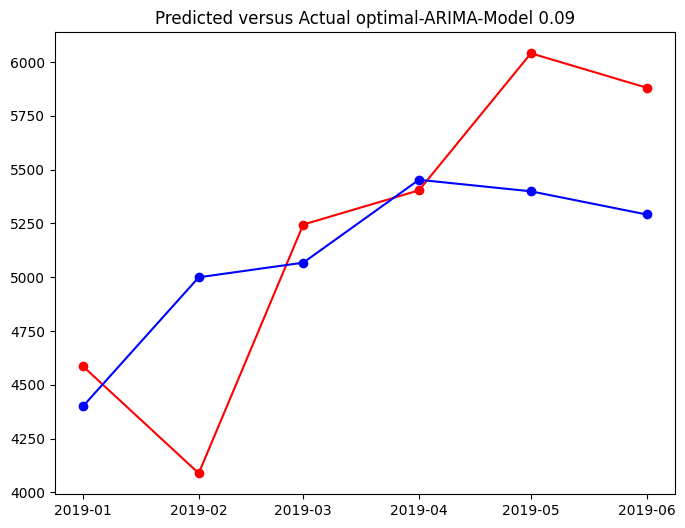

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
optimal_arima_mape = mean_absolute_percentage_error(ma_predicted_df['CMILES'], ma_predicted_df['otimal_ARMA_Pred'])
# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')

# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['otimal_ARMA_Pred'], color='BLUE')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['otimal_ARMA_Pred'], color='BLUE')
#print(MA_mape)
ax.set_title("Predicted versus Actual optimal-ARIMA-Model " + str(round(optimal_arima_mape, 2)))
plt.show()

### Assessing Optimal ARMA model Performance

In [73]:
test_stat = acorr_ljungbox(ma_predicted_df['otimal_ARMA_res'], np.arange(1,5,1))
test_stat.head()

c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\numpy\core\_asarray.py:126: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  arr = array(a, dtype=dtype, order=order, copy=False, subok=subok)


,lb_stat,lb_pvalue
1,0.000486,0.982406
2,0.076401,0.962520
3,1.805006,0.613846
4,3.717420,0.445597


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


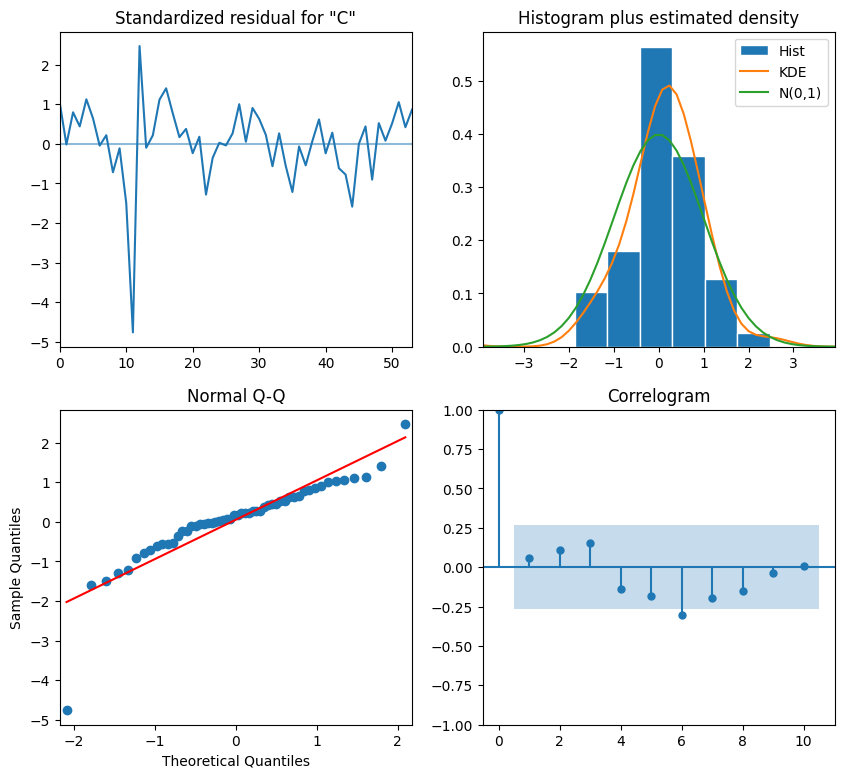

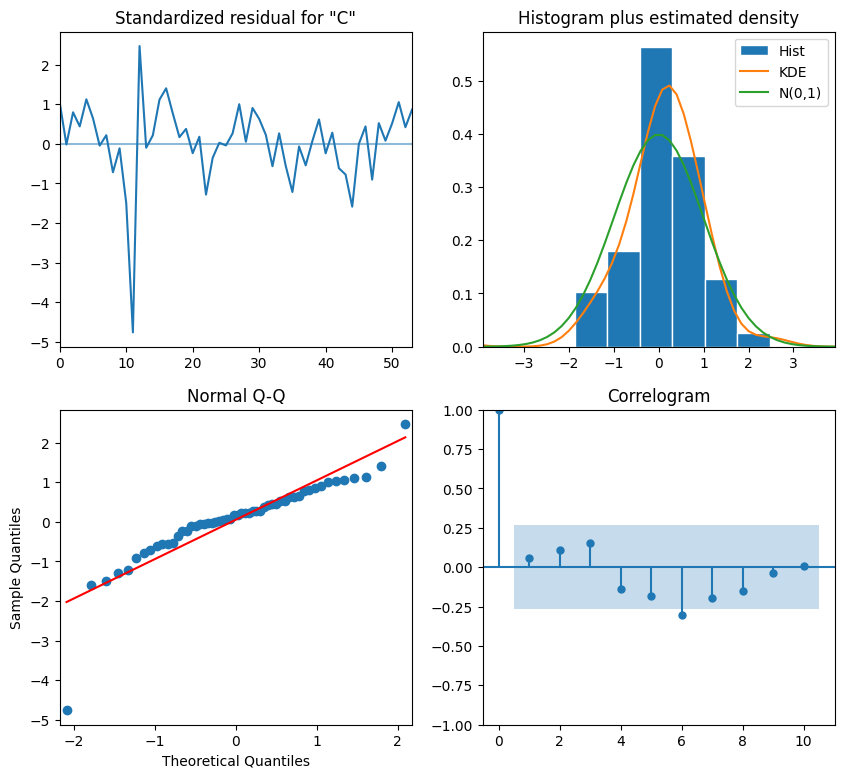

In [75]:
order = (1, 0, 3)
model = SARIMAX(train['CMILES'], order= order)
model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize = (10,9))